In [1]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [2]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("mocap",False)

data
(1285, 4)
DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-02-23 03:00:00', '2012-02-23 04:00:00',
               '2012-02-23 05:00:00', '2012-02-23 06:00:00',
               '2012-02-23 07:00:00', '2012-02-23 08:00:00',
               '2012-02-23 09:00:00', '2012-02-23 10:00:00',
               '2012-02-23 11:00:00', '2012-02-23 12:00:00'],
              dtype='datetime64[ns]', name='date', length=1285, freq=None)
(1285, 4)
data
(1285, 4)
slice(None, 771, None)
slice(771, 1028, None)
slice(1028, None, None)
(1, 1285, 4)


ValueError: not enough values to unpack (expected 8, got 7)

In [ ]:
data.shape

(1, 1285, 11)

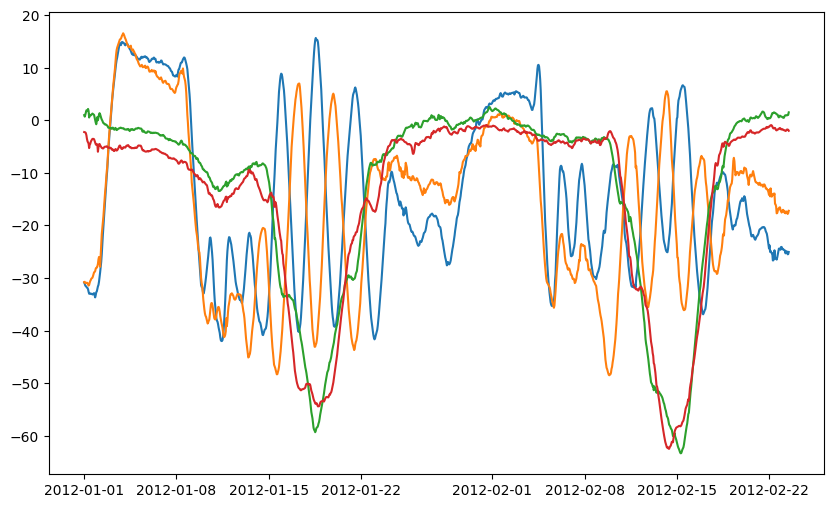

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [ ]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data.shape[-1],
    device="cpu",
    output_dims=320
    #output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True
)

Epoch #0: loss=103.98945617675781
Epoch #1: loss=64.01896667480469
Epoch #2: loss=5.177196502685547
Epoch #3: loss=17.14943504333496
Epoch #4: loss=13.557029724121094
Epoch #5: loss=36.02687072753906
Epoch #6: loss=4.772274494171143
Epoch #7: loss=14.580766677856445
Epoch #8: loss=11.146943092346191
Epoch #9: loss=2.2830233573913574
Epoch #10: loss=7.97807502746582
Epoch #11: loss=6.021165370941162
Epoch #12: loss=2.3346455097198486
Epoch #13: loss=8.08867073059082
Epoch #14: loss=7.764805793762207
Epoch #15: loss=4.27672004699707
Epoch #16: loss=5.979536056518555
Epoch #17: loss=3.7148332595825195
Epoch #18: loss=7.184943675994873
Epoch #19: loss=5.293578147888184
Epoch #20: loss=6.538429260253906
Epoch #21: loss=7.622617721557617
Epoch #22: loss=5.352673530578613
Epoch #23: loss=2.1651341915130615
Epoch #24: loss=2.637773275375366
Epoch #25: loss=4.924911975860596
Epoch #26: loss=2.7218809127807617
Epoch #27: loss=4.291232109069824
Epoch #28: loss=3.17897367477417
Epoch #29: loss=3.9

In [ ]:
model.save(f'mocap_mix_320.pkl')

In [ ]:
all_repr = model.encode(
        data,
        causal=False,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

In [ ]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-0.02828477  0.02362264 -0.01663459 ...  0.07427741  0.02142364
    0.03190371]
  [-0.03008667  0.02526037 -0.01810202 ...  0.07765769  0.02270104
    0.03691659]
  [-0.03953875  0.04334612 -0.00904714 ...  0.07546481  0.03906121
    0.00832575]
  ...
  [-0.00258743  0.01222759 -0.02952072 ...  0.00393829 -0.00834952
   -0.0230744 ]
  [-0.00422272  0.0108474  -0.02418779 ...  0.00890252 -0.00156823
   -0.01492709]
  [-0.01813486  0.00419682 -0.01992764 ...  0.01117097  0.00376566
   -0.01184551]]]


In [ ]:
all_repr.shape

(1, 1285, 320)

In [ ]:
test_repr.shape

(1, 257, 320)

In [ ]:
test_2d = all_repr.reshape(1285, 320)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import numpy as np
data_test=data1

In [ ]:
data_test.shape

(1285, 4)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
dbscan.fit(test_2d)
labels = dbscan.labels_

In [ ]:
date=data_test.index
date_list=date.tolist()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_95703/583540433.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


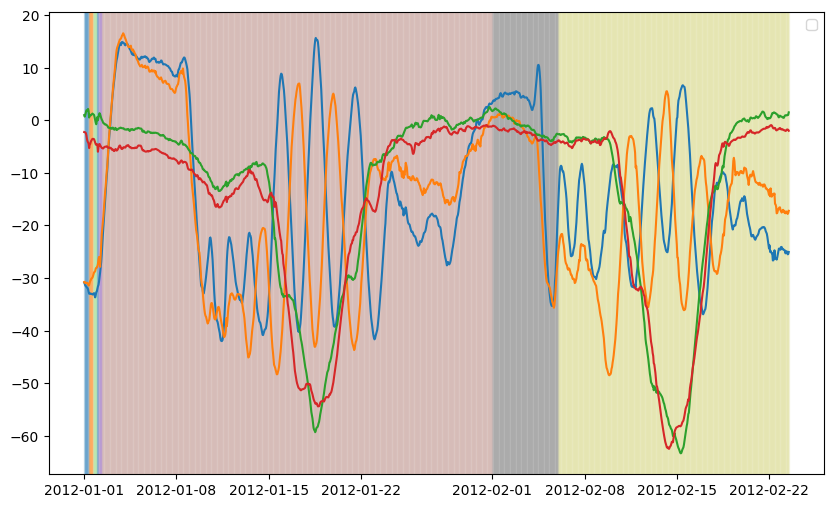

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [ ]:
# import matplotlib.cm as cm
# from matplotlib.colors import ListedColormap
# cmap = cm.Set1
# # ラベルの一覧を取得します
# num_clusters = len(set(labels))  # クラスタの数
# cmap = cm.get_cmap('tab20', num_clusters) 
# plt.figure(figsize=(10, 6))
# # 各ラベルごとにプロットします
# for label in set(labels):
#     plt.plot(data_test[labels == label], label=f'Cluster {label}',c=cmap(label))

# #plt.legend()  # 凡例を表示します
# plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_95703/1211746902.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


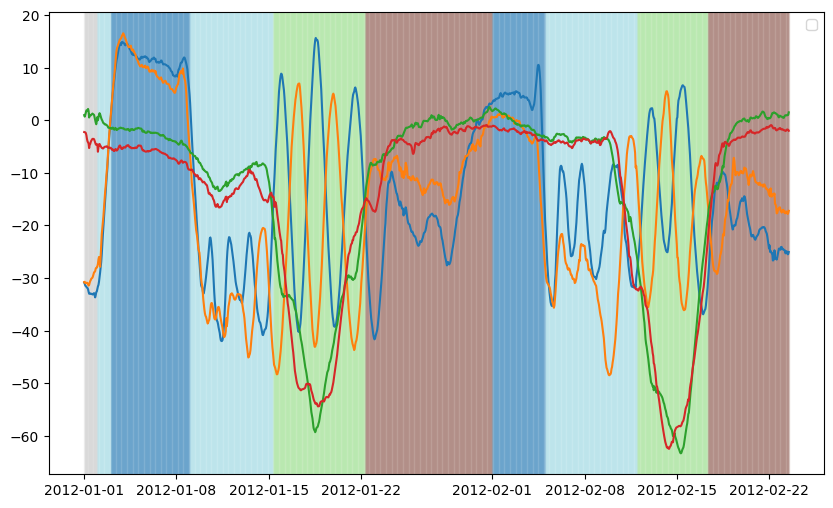

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=5)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_95703/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


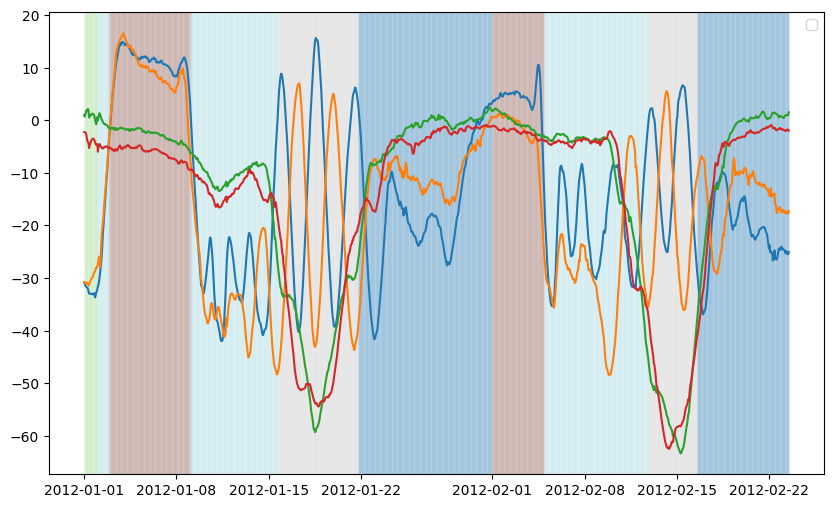

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_95703/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


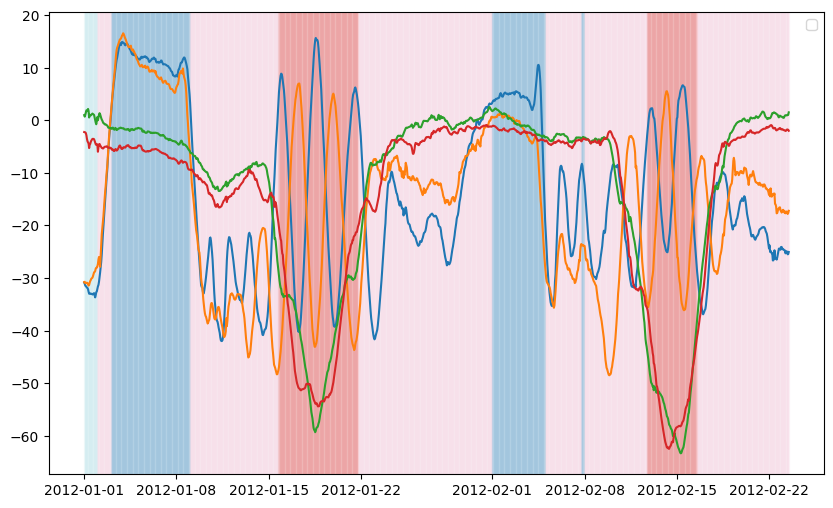

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [ ]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_95703/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


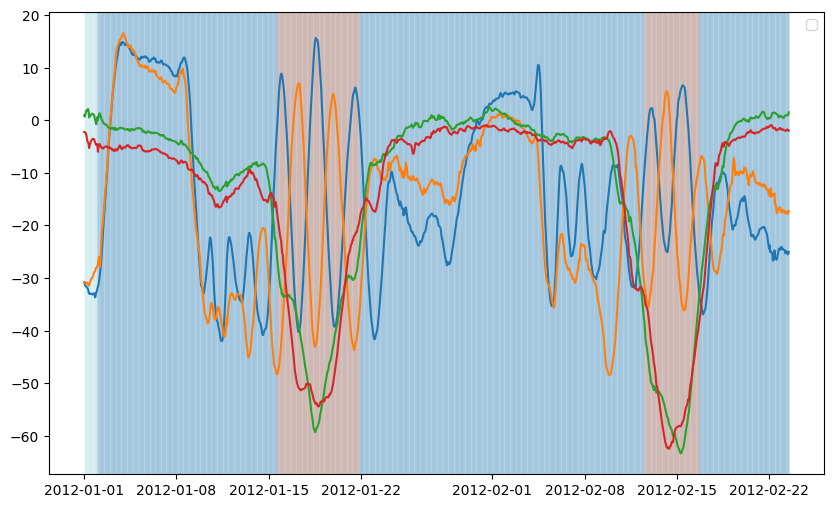

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

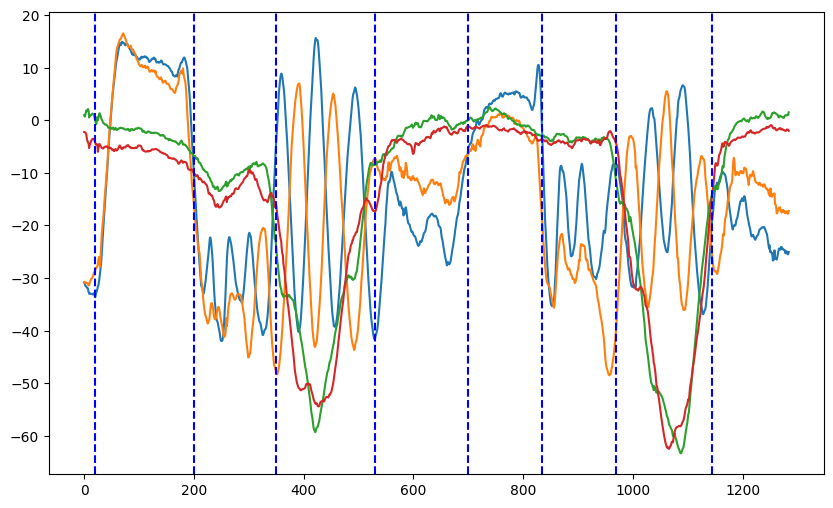

In [ ]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='b', linestyle='--')
plt.axvline(x=200, color='b', linestyle='--')
plt.axvline(x=350, color='b', linestyle='--')
plt.axvline(x=530, color='b', linestyle='--')
plt.axvline(x=700, color='b', linestyle='--')
plt.axvline(x=835, color='b', linestyle='--')
plt.axvline(x=970, color='b', linestyle='--')
plt.axvline(x=1145, color='b', linestyle='--')

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_95703/1855845376.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


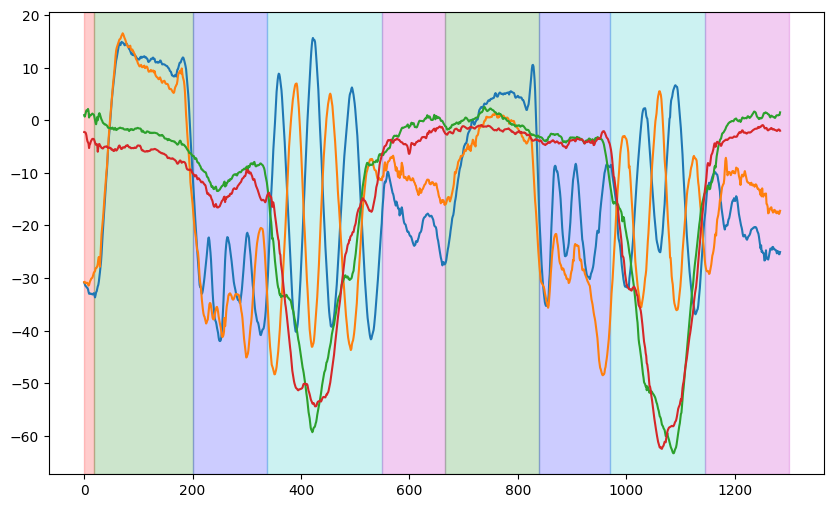

In [ ]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,19,200,338,550,665,840,970,1145,1300]
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
plt.plot(data_test_copy) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [ ]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

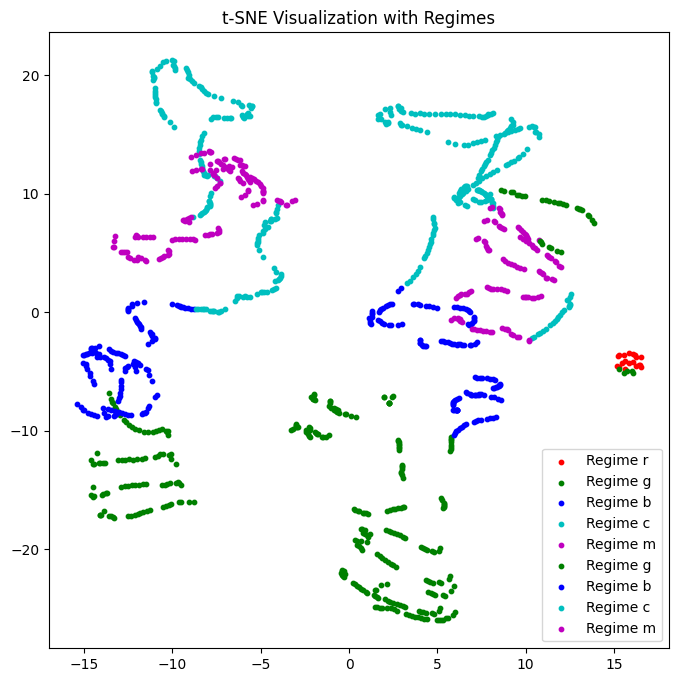

In [ ]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 10000)

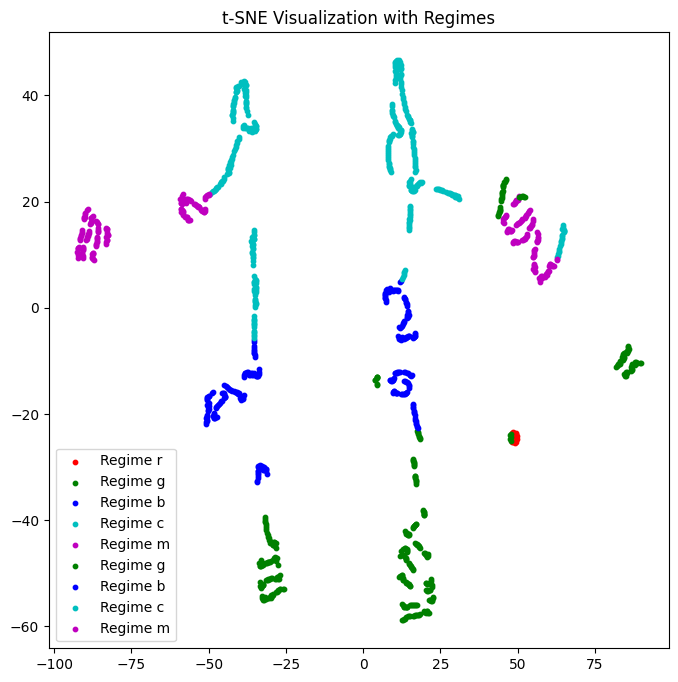

In [ ]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()